In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import pearsonr

In [2]:
df=pd.read_csv('housing_prices.csv')

In [3]:
nacol =df.isna().sum()

In [4]:
round((nacol[nacol>0]/df.shape[0]*100),2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [5]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [6]:
df.Fence=df.Fence.fillna(0)

In [7]:
df.LotFrontage=df.LotFrontage.fillna(0)

In [8]:
df.drop(['MiscFeature','PoolQC', 'Alley'], axis=1,inplace=True)

In [9]:
nacol=df.isna().sum

In [10]:
round((nacol[nacol>0]/df.shape[0]*100),2)

TypeError: '>' not supported between instances of 'method' and 'int'

In [12]:
print([i for i in df.columns if i not in df._get_numeric_data().columns])

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [14]:
pd.get_dummies(df.MSZoning, drop_first=True,prefix='MsZone')

,MsZone_FV,MsZone_RH,MsZone_RL,MsZone_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,0,1
9,0,0,1,0


In [15]:
df[['MSZone_FV','MSZone_RH', 'MSZone_RL','MSZone_RM']]=pd.get_dummies(df.MSZoning,drop_first=True, prefix='MSZone')

In [16]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [17]:
df['Pave']=[1 if i=='Pave' else 0 for i in df.Street]

In [18]:
df.Pave.value_counts()

1    1454
0       6
Name: Pave, dtype: int64

In [ ]:
df.drop(['Pave','Street'], axis=1, inplace=True)

In [19]:
df.LotShape.value_counts()


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [20]:
labels=df.LotShape.unique().tolist()
n_lotshape=dict(zip(labels,range(len(labels))))

In [21]:
df.replace({'LotShape': n_lotshape}, inplace=True)

In [22]:
df.LotShape.value_counts()

0    925
1    484
2     41
3     10
Name: LotShape, dtype: int64

In [23]:
df.LandContour.value_counts()
df.drop('LandContour')

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [ ]:
df.Utilities.value_counts()
df.drop('Utilities', axis=1,)

In [ ]:
df.LotConfig.value_counts()
lotconf=pd.

In [24]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [25]:
df.drop(['MSZoning','LotConfig','LandSlope','Neighborhood','Condition1','Condition2'],axis=1,inplace=True)

In [ ]:
print(([i for i in df.columns if i not in df._get_numeric_data().columns]))

In [27]:
round(df.SaleType.value_counts()/df.shape[0]*100,2)
round(df.SaleCondition.value_counts()/df.shape[0]*100,2)

Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
AdjLand     0.27
Name: SaleCondition, dtype: float64

In [30]:
df1=pd.concat([df,lotconf,nbhd], axis=1)

NameError: name 'lotconf' is not defined

In [29]:
df1c=abs(df1.corr())
f,ax=plt.subplots(figsize=(20,8))
sns.heatmap(df1c,cmap=sns.diverging_palette(220,10,as_map=True),square=True,ax=ax)

NameError: name 'df1' is not defined

In [31]:
df1.SalePrice[df1c.SalePrice>0.4]

NameError: name 'df1' is not defined

In [ ]:
sns.jointplot(y='SalePrice', x='OverallQual', data=df1,kind='reg')

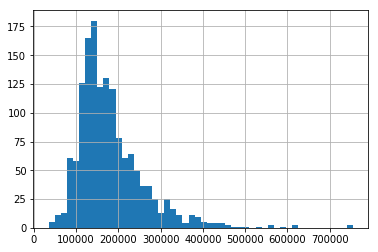

In [32]:
df.SalePrice.hist(bins=50)

In [ ]:
labels=df.Neighborhood.unique().tolist()
n_nbgh=dict(zip(labels,range(len(labels))))
df.replace({'Neighborhood': n_lotshape}, inplace=True)

In [34]:
sns.jointplot(y='SalePrice',x='Neighborhood',data=df1,kind='reg')

NameError: name 'df1' is not defined